Analysis of the HASOC dataset in english

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
from pathlib import Path

# Add src/ to path (once, so imports work)
sys.path.append(str(Path().resolve().parent / "src"))

# Now you can import paths
from paths import DATA_PROCESSED

Read in dataset

In [2]:
df = pd.read_csv(DATA_PROCESSED / "hasoc_2019_en_train.tsv", sep='\t')
df.head()

,text_id,text,task_1,task_2,task_3
0,hasoc_en_1,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,NOT,NONE,NONE
1,hasoc_en_2,@politico No. We should remember very clearly ...,HOF,HATE,TIN
2,hasoc_en_3,@cricketworldcup Guess who would be the winner...,NOT,NONE,NONE
3,hasoc_en_4,Corbyn is too politically intellectual for #Bo...,NOT,NONE,NONE
4,hasoc_en_5,All the best to #TeamIndia for another swimmin...,NOT,NONE,NONE


Structure of dataset

In [3]:
print("Form of dataset:", df.shape)
print("\nNames of columns:", df.columns.tolist())
df.info()

Form of dataset: (5852, 5)

Names of columns: ['text_id', 'text', 'task_1', 'task_2', 'task_3']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text_id  5852 non-null   object
 1   text     5852 non-null   object
 2   task_1   5852 non-null   object
 3   task_2   5852 non-null   object
 4   task_3   5852 non-null   object
dtypes: object(5)
memory usage: 228.7+ KB


Check if values are missing

In [4]:
print(df.isnull().sum()) # if zero than no missing values

text_id    0
text       0
task_1     0
task_2     0
task_3     0
dtype: int64


In [5]:
df.sample(5)

,text_id,text,task_1,task_2,task_3
3853,hasoc_en_3854,*enter sarcasm* They don't need evidence to pr...,NOT,NONE,NONE
806,hasoc_en_807,"Oye!!!, Islamic Cricket Council aka @ICC ban t...",NOT,NONE,NONE
4397,hasoc_en_4398,@Carterjnelson1 @CoryBooker Says the man who i...,HOF,PRFN,UNT
2345,hasoc_en_2346,"Dear @ICC, Instead of focussing on @msdhoni ...",NOT,NONE,NONE
2626,hasoc_en_2627,@realDonaldTrump Donnie.....you’re just saying...,HOF,HATE,TIN


Check distribution of labels of the three tasks

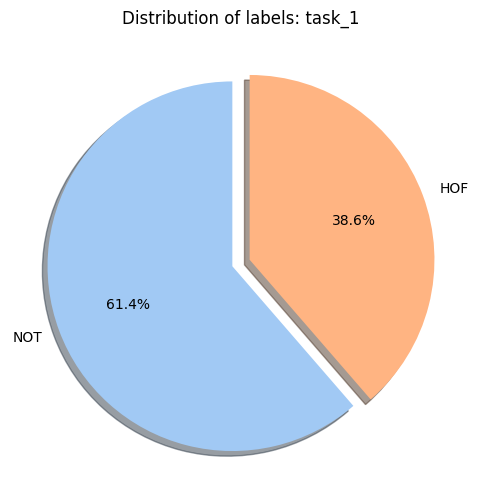

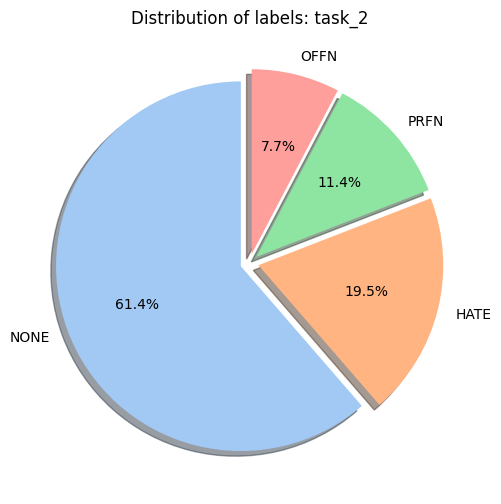

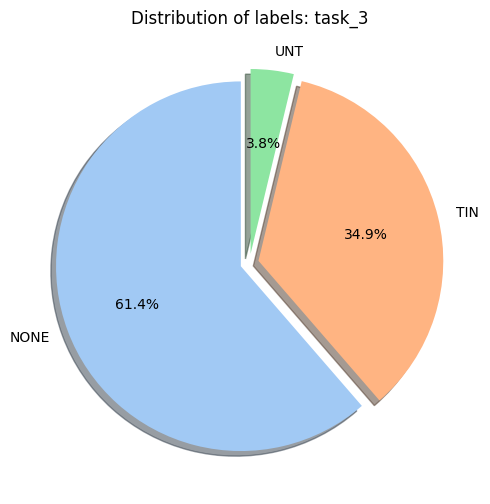

In [6]:
label_columns = [col for col in df.columns if col.startswith("task")]

for column in label_columns:
    plt.figure(figsize=(6,6))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, 
                                       shadow=True, explode=[0.05]*df[column].nunique(),
                                       colors=sns.color_palette("pastel"))
    plt.title(f"Distribution of labels: {column}")
    plt.ylabel("") 
    plt.show()

Check length of messages

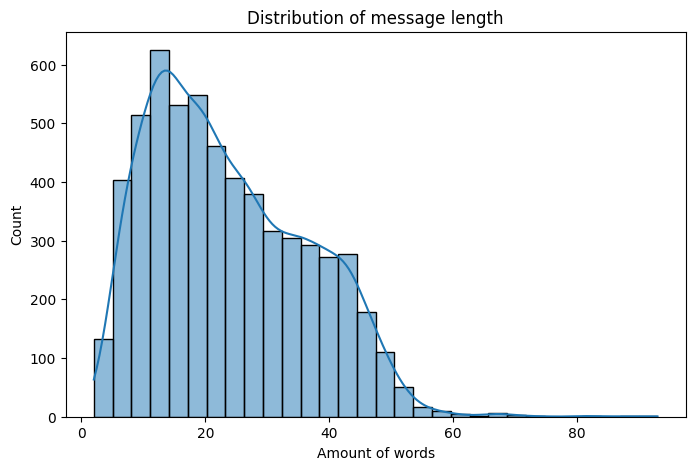

In [7]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Distribution of message length")
plt.xlabel("Amount of words")
plt.show()

In [8]:
# Longest message regarding number of words
max_row = df.loc[df['text_length'].idxmax()]
print("Longest text (regarding words):")
print(max_row['text'])
print(f"\nNumber of words: {max_row['text_length']}")

Longest text (regarding words):
@sagenaradamuni @bjptarunchugh @NaMo_Ganesh @HarishK04131926 @HIMESH_SS @mattarhegde @YashpalBJP @DheerajGbc @Harvansh_Batra @VictoryForNamo @narendramodi177 @LillyMaryPinto @narendramodi @sukanyaiyer2 @meenakshisharan @Meenu_71 @RamsaBJYM @bakoriya_kirti_ @sanghavideepa @OnlineRajan__ @samar97189157 @PatelOnTop @AjayPandey__ @DebashishHiTs @ankitasood13 @hindustanse @MahiHerambha @hindu_blood @SmithaDutt @vanitajain21 @Reema_bjp @Narendramodi_PM @Narendrap86 @TigerNaMo @aarohi923 @draksbond @jadonpriyanka @NazlinShaikh @AmitShah @iNarendraModiG @Gravim71 @pehadiya @prasura123 @Lotusfeetns @MajorPoonia @GautamGambhir @PrakashMishra_1 @SureshM46 @pandey_indrani @madhukishwar People who r scared with #Modi r saying there is no #ModiWave. India is witnessing mammoth crowd across Bharat to listen to #NarendraModi ji. I am Happy with #VadrasFlee &amp; #NoBandhan with Congress. With this, #May23 is sure about #ModiAgain #ModiAgainSaysIndia #CongressMuktBharat 

In [9]:
# Longest message regarding number of characters
df['char_count'] = df['text'].apply(lambda x: len(str(x)))
max_row_char = df.loc[df['char_count'].idxmax()]
print("Longest text (regarding characters):")
print(max_row_char['text'])
print(f"\nNumber of characters: {max_row_char['char_count']}")

Longest text (regarding characters):
@sagenaradamuni @bjptarunchugh @NaMo_Ganesh @HarishK04131926 @HIMESH_SS @mattarhegde @YashpalBJP @DheerajGbc @Harvansh_Batra @VictoryForNamo @narendramodi177 @LillyMaryPinto @narendramodi @sukanyaiyer2 @meenakshisharan @Meenu_71 @RamsaBJYM @bakoriya_kirti_ @sanghavideepa @OnlineRajan__ @samar97189157 @PatelOnTop @AjayPandey__ @DebashishHiTs @ankitasood13 @hindustanse @MahiHerambha @hindu_blood @SmithaDutt @vanitajain21 @Reema_bjp @Narendramodi_PM @Narendrap86 @TigerNaMo @aarohi923 @draksbond @jadonpriyanka @NazlinShaikh @AmitShah @iNarendraModiG @Gravim71 @pehadiya @prasura123 @Lotusfeetns @MajorPoonia @GautamGambhir @PrakashMishra_1 @SureshM46 @pandey_indrani @madhukishwar People who r scared with #Modi r saying there is no #ModiWave. India is witnessing mammoth crowd across Bharat to listen to #NarendraModi ji. I am Happy with #VadrasFlee &amp; #NoBandhan with Congress. With this, #May23 is sure about #ModiAgain #ModiAgainSaysIndia #CongressMuktBh

In [10]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Apply tokenization and get token lengths
df['bert_token_count'] = df['text'].apply(lambda x: len(tokenizer.tokenize(str(x))))

# Show max token length and sample text
max_tokens_row = df.loc[df['bert_token_count'].idxmax()]
print("Text with the most BERT tokens:")
print(max_tokens_row['text'])
print(f"\nNumber of BERT tokens: {max_tokens_row['bert_token_count']}")

Text with the most BERT tokens:
@sagenaradamuni @bjptarunchugh @NaMo_Ganesh @HarishK04131926 @HIMESH_SS @mattarhegde @YashpalBJP @DheerajGbc @Harvansh_Batra @VictoryForNamo @narendramodi177 @LillyMaryPinto @narendramodi @sukanyaiyer2 @meenakshisharan @Meenu_71 @RamsaBJYM @bakoriya_kirti_ @sanghavideepa @OnlineRajan__ @samar97189157 @PatelOnTop @AjayPandey__ @DebashishHiTs @ankitasood13 @hindustanse @MahiHerambha @hindu_blood @SmithaDutt @vanitajain21 @Reema_bjp @Narendramodi_PM @Narendrap86 @TigerNaMo @aarohi923 @draksbond @jadonpriyanka @NazlinShaikh @AmitShah @iNarendraModiG @Gravim71 @pehadiya @prasura123 @Lotusfeetns @MajorPoonia @GautamGambhir @PrakashMishra_1 @SureshM46 @pandey_indrani @madhukishwar People who r scared with #Modi r saying there is no #ModiWave. India is witnessing mammoth crowd across Bharat to listen to #NarendraModi ji. I am Happy with #VadrasFlee &amp; #NoBandhan with Congress. With this, #May23 is sure about #ModiAgain #ModiAgainSaysIndia #CongressMuktBharat 

Cleaning of dataset required. 
Nametags do not give any information regarding wether the text is hate speech or not